# Imports

In [1]:
import pandas as pd
import os
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'/home/pedro/code/rafabertolace/OnThePitch/notebooks'

In [3]:
print(os.listdir('../OnThePitch/data'))

['Turkey_2020_2021.csv', '.keep', 'Turkey_2021_2022.csv', 'T1.csv:Zone.Identifier', 'Turkey_2019_2020.csv']


In [4]:
files = [file for file in os.listdir('../OnThePitch/data') if file.endswith('.csv')]
data = pd.DataFrame()

for file in files:
    df = pd.read_csv('../OnThePitch/data/' + file)
    data = pd.concat([data, df])

In [90]:
data = data.dropna()
data.head(10)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,T1,11/09/2020,18:00,Rizespor,Fenerbahce,1,2,A,0,0,...,2.11,0.50,1.95,1.90,1.94,1.94,1.99,1.99,1.93,1.90
1,T1,12/09/2020,15:00,Karagumruk,Yeni Malatyaspor,3,0,H,1,0,...,1.93,0.00,2.02,1.83,2.01,1.89,2.08,1.90,2.01,1.84
2,T1,12/09/2020,15:00,Sivasspor,Alanyaspor,0,2,A,0,1,...,2.13,-0.25,1.85,2.00,1.85,2.06,1.93,2.06,1.84,2.01
3,T1,12/09/2020,18:00,Galatasaray,Gaziantep,3,1,H,3,0,...,2.32,-1.00,1.88,1.98,1.94,1.96,1.97,2.04,1.87,1.97
4,T1,12/09/2020,18:00,Goztep,Denizlispor,5,1,H,3,0,...,1.77,-0.25,1.93,1.93,1.94,1.96,1.97,1.98,1.91,1.93
5,T1,13/09/2020,15:00,Ankaragucu,Erzurum BB,1,2,A,0,0,...,1.77,0.00,1.80,2.05,1.80,2.13,1.94,2.13,1.84,2.00
6,T1,13/09/2020,15:00,Kayserispor,Kasimpasa,1,0,H,1,0,...,2.09,0.25,2.02,1.83,2.09,1.83,2.12,1.86,2.06,1.79
7,T1,13/09/2020,18:00,Antalyaspor,Genclerbirligi,2,0,H,1,0,...,2.13,-0.50,2.00,1.85,1.96,1.94,2.04,1.94,1.98,1.86
8,T1,13/09/2020,18:00,Trabzonspor,Besiktas,1,3,A,0,1,...,2.34,-0.25,1.95,1.90,1.97,1.93,2.03,1.99,1.93,1.92
9,T1,14/09/2020,18:00,Hatayspor,Buyuksehyr,2,0,H,1,0,...,1.92,0.50,2.02,1.77,2.09,1.81,2.12,1.85,2.07,1.79


In [6]:
for col_name in data.columns: 
    print(col_name)

Div
Date
Time
HomeTeam
AwayTeam
FTHG
FTAG
FTR
HTHG
HTAG
HTR
HS
AS
HST
AST
HF
AF
HC
AC
HY
AY
HR
AR
B365H
B365D
B365A
BWH
BWD
BWA
IWH
IWD
IWA
PSH
PSD
PSA
WHH
WHD
WHA
VCH
VCD
VCA
MaxH
MaxD
MaxA
AvgH
AvgD
AvgA
B365>2.5
B365<2.5
P>2.5
P<2.5
Max>2.5
Max<2.5
Avg>2.5
Avg<2.5
AHh
B365AHH
B365AHA
PAHH
PAHA
MaxAHH
MaxAHA
AvgAHH
AvgAHA
B365CH
B365CD
B365CA
BWCH
BWCD
BWCA
IWCH
IWCD
IWCA
PSCH
PSCD
PSCA
WHCH
WHCD
WHCA
VCCH
VCCD
VCCA
MaxCH
MaxCD
MaxCA
AvgCH
AvgCD
AvgCA
B365C>2.5
B365C<2.5
PC>2.5
PC<2.5
MaxC>2.5
MaxC<2.5
AvgC>2.5
AvgC<2.5
AHCh
B365CAHH
B365CAHA
PCAHH
PCAHA
MaxCAHH
MaxCAHA
AvgCAHH
AvgCAHA


# General Odds Comparison (B365, Pinnacle, Average and Maximum)

In [7]:
odds_under_df = data[['Date', 'B365<2.5', 'P<2.5', 'Avg<2.5', 'Max<2.5']]
odds_over_df = data[['Date', 'B365>2.5', 'P>2.5', 'Avg>2.5', 'Max>2.5']]

Visual approach comparing the **Average Market Odds**, the **Maximum Market Odds**, **Bet365 Odds** and **Pinnacle Odds**.

We can see the odds are really close to each other, with few episodes of displacements!

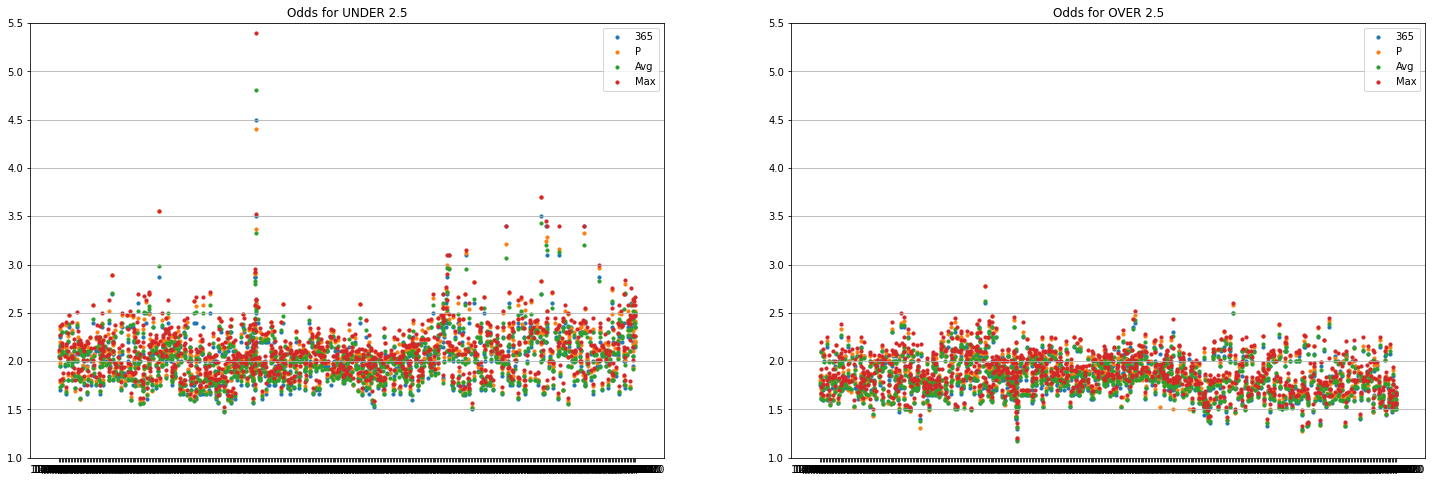

In [111]:
plt.figure(figsize=(25,8))
plt.subplot(1, 2, 1)
plt.scatter(odds_under_df['Date'], odds_under_df['B365<2.5'], label='365', s=10);
plt.scatter(odds_under_df['Date'], odds_under_df['P<2.5'], label='P', s=10);
plt.scatter(odds_under_df['Date'], odds_under_df['Avg<2.5'], label='Avg', s=10);
plt.scatter(odds_under_df['Date'], odds_under_df['Max<2.5'], label='Max', s=10);
plt.legend();
plt.grid(axis='y');
plt.ylim(1, 5.5);
plt.title('Odds for UNDER 2.5');
plt.subplot(1, 2, 2)
plt.scatter(odds_over_df['Date'], odds_over_df['B365>2.5'], label='365', s=10);
plt.scatter(odds_over_df['Date'], odds_over_df['P>2.5'], label='P', s=10);
plt.scatter(odds_over_df['Date'], odds_over_df['Avg>2.5'], label='Avg', s=10);
plt.scatter(odds_over_df['Date'], odds_over_df['Max>2.5'], label='Max', s=10);
plt.legend();
plt.grid(axis='y');
plt.ylim(1, 5.5);
plt.title('Odds for OVER 2.5');

Same graphs plotted here, but bigger to help visualization.

We can see as well **OVER 2.5** shows a denser mass, with odds really close to each other, while **UNDER 2.5** has a slightly displacement, showing a possible potential of earnings! 

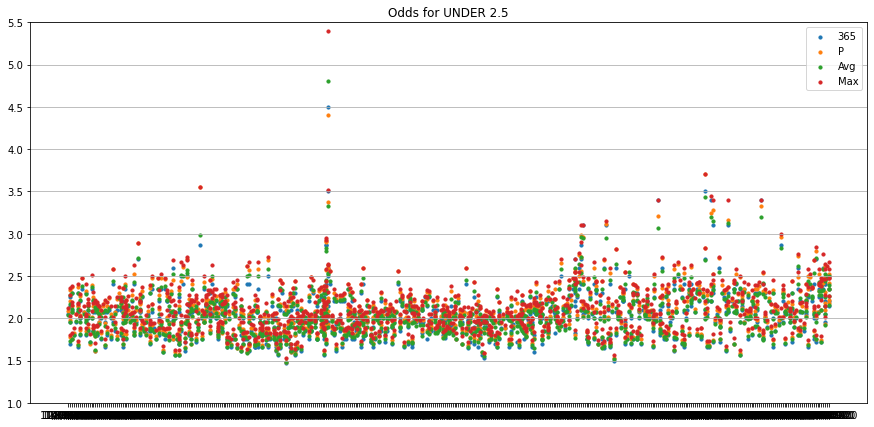

In [112]:
plt.figure(figsize=(15,7))
plt.scatter(odds_under_df['Date'], odds_under_df['B365<2.5'], label='365', s=10);
plt.scatter(odds_under_df['Date'], odds_under_df['P<2.5'], label='P', s=10);
plt.scatter(odds_under_df['Date'], odds_under_df['Avg<2.5'], label='Avg', s=10);
plt.scatter(odds_under_df['Date'], odds_under_df['Max<2.5'], label='Max', s=10);
plt.legend();
plt.grid(axis='y');
plt.ylim(1, 5.5);
plt.title('Odds for UNDER 2.5');

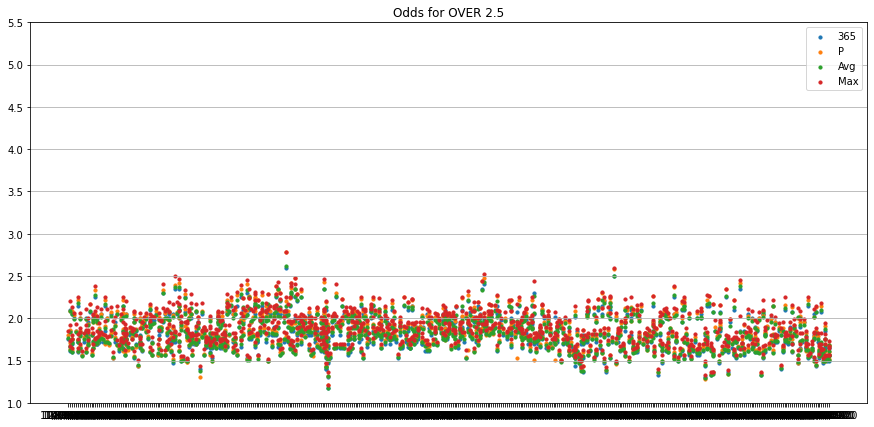

In [113]:
plt.figure(figsize=(15,7))
plt.scatter(odds_over_df['Date'], odds_over_df['B365>2.5'], label='365', s=10);
plt.scatter(odds_over_df['Date'], odds_over_df['P>2.5'], label='P', s=10);
plt.scatter(odds_over_df['Date'], odds_over_df['Avg>2.5'], label='Avg', s=10);
plt.scatter(odds_over_df['Date'], odds_over_df['Max>2.5'], label='Max', s=10);
plt.legend();
plt.grid(axis='y');
plt.ylim(1, 5.5);
plt.title('Odds for OVER 2.5');

This approach confirms that bookies' predictions are really accurate, and hardly diverge from market predictions. So we must find opportunities among these predictions with better odds/payoff rates than the average ones.   

# Specific Odds Comparison

This graph shows us the **STRONG** correlation between the Odds for **UNDER 2.5**!

1st: Pinnacle Odds (X) x Bet365/Average/Maximum Odds (y)

2nd: Bet365 Odds (X) x Pinnacle/Average/Maximum Odds (y)

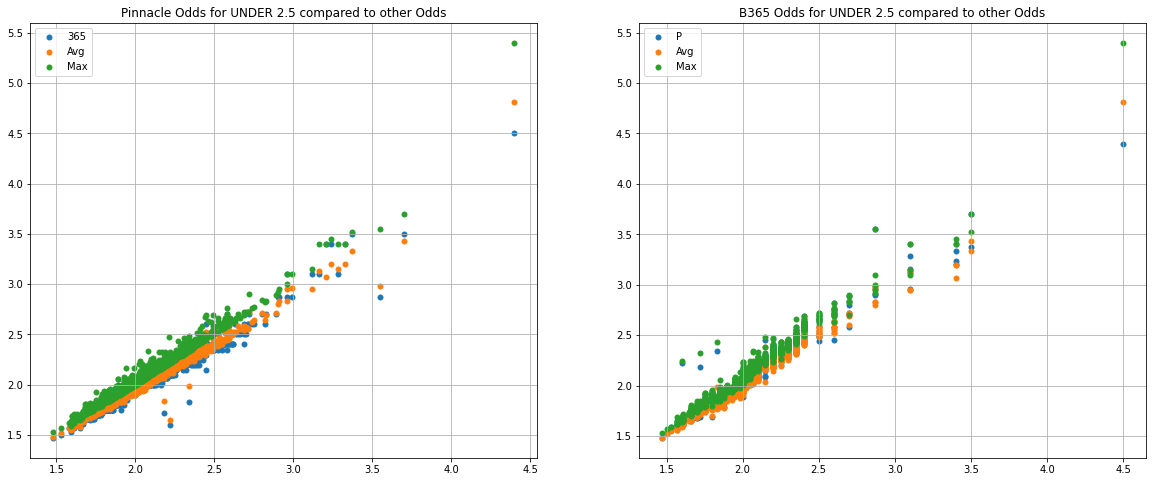

In [11]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.scatter(odds_under_df['P<2.5'], odds_under_df['B365<2.5'], label='365', linewidths=0);
plt.scatter(odds_under_df['P<2.5'], odds_under_df['Avg<2.5'], label='Avg', linewidths=0);
plt.scatter(odds_under_df['P<2.5'], odds_under_df['Max<2.5'], label='Max', linewidths=0);
plt.legend();
plt.grid(axis='both');
plt.title('Pinnacle Odds for UNDER 2.5 compared to other Odds');
plt.subplot(1, 2, 2)
plt.scatter(odds_under_df['B365<2.5'], odds_under_df['P<2.5'], label='P', linewidths=0);
plt.scatter(odds_under_df['B365<2.5'], odds_under_df['Avg<2.5'], label='Avg', linewidths=0);
plt.scatter(odds_under_df['B365<2.5'], odds_under_df['Max<2.5'], label='Max', linewidths=0);
plt.legend();
plt.grid(axis='both');
plt.title('B365 Odds for UNDER 2.5 compared to other Odds');

Again, the **STRONG** correlation between the Odds, now for **OVER 2.5**!

1st: Pinnacle Odds (X) x Bet365/Average/Maximum Odds (y)

2nd: Bet365 Odds (X) x Pinnacle/Average/Maximum Odds (y)

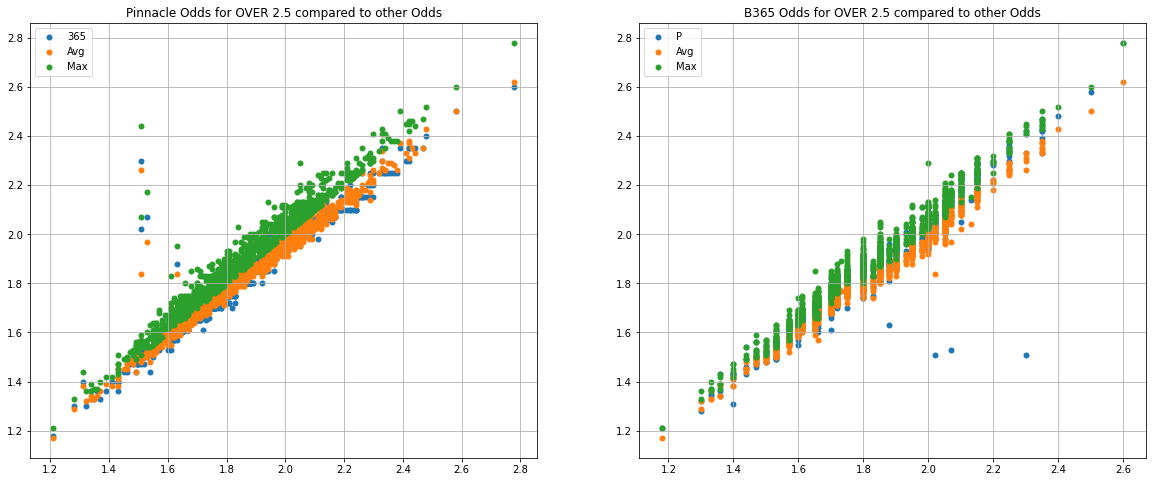

In [12]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.scatter(odds_over_df['P>2.5'], odds_over_df['B365>2.5'], label='365', linewidths=0);
plt.scatter(odds_over_df['P>2.5'], odds_over_df['Avg>2.5'], label='Avg', linewidths=0);
plt.scatter(odds_over_df['P>2.5'], odds_over_df['Max>2.5'], label='Max', linewidths=0);
plt.legend();
plt.grid(axis='both');
plt.title('Pinnacle Odds for OVER 2.5 compared to other Odds');
plt.subplot(1, 2, 2)
plt.scatter(odds_over_df['B365>2.5'], odds_over_df['P>2.5'], label='P', linewidths=0);
plt.scatter(odds_over_df['B365>2.5'], odds_over_df['Avg>2.5'], label='Avg', linewidths=0);
plt.scatter(odds_over_df['B365>2.5'], odds_over_df['Max>2.5'], label='Max', linewidths=0);
plt.legend();
plt.grid(axis='both');
plt.title('B365 Odds for OVER 2.5 compared to other Odds');

# Goals and Payouts

## Number of Goals

In [114]:
# total number of goals = goals from the home team + goals from visiting team
data['nb_goals'] = data['FTHG'] + data['FTAG']

# boolean: true or false regarding whether they were more than 2.5 goals
data['over_2.5_goals'] = data['nb_goals'] > 2.5

# boolean: true or false regarding whether they were less than 2.5 goals
data['under_2.5_goals'] = data['nb_goals'] < 2.5

## Payout

### Average

In [116]:
# payout under 2.5 for Average OPENING odds
data['payout_avg_under_2.5'] = data['under_2.5_goals'] * data['Avg<2.5']

# payout over 2.5 for Average OPENING odds
data['payout_avg_over_2.5'] = data['over_2.5_goals'] * data['Avg>2.5']

# payout under 2.5 for Average CLOSING odds
data['payout_avg_under_closing_2.5'] = data['under_2.5_goals'] * data['AvgC<2.5']

# payout over 2.5 for Average CLOSING odds
data['payout_avg_over_closing_2.5'] = data['over_2.5_goals'] * data['AvgC>2.5']

In [117]:
data

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,MaxCAHA,AvgCAHH,AvgCAHA,nb_goals,over_2.5_goals,under_2.5_goals,payout_avg_under_2.5,payout_avg_over_2.5,payout_avg_under_closing_2.5,payout_avg_over_closing_2.5
0,T1,11/09/2020,18:00,Rizespor,Fenerbahce,1,2,A,0,0,...,1.99,1.93,1.90,3,True,False,0.00,1.77,0.00,1.73
1,T1,12/09/2020,15:00,Karagumruk,Yeni Malatyaspor,3,0,H,1,0,...,1.90,2.01,1.84,3,True,False,0.00,1.84,0.00,1.87
2,T1,12/09/2020,15:00,Sivasspor,Alanyaspor,0,2,A,0,1,...,2.06,1.84,2.01,2,False,True,2.17,0.00,2.13,0.00
3,T1,12/09/2020,18:00,Galatasaray,Gaziantep,3,1,H,3,0,...,2.04,1.87,1.97,4,True,False,0.00,1.62,0.00,1.60
4,T1,12/09/2020,18:00,Goztep,Denizlispor,5,1,H,3,0,...,1.98,1.91,1.93,6,True,False,0.00,2.09,0.00,2.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,T1,25/07/2020,19:00,Fenerbahce,Rizespor,3,1,H,1,0,...,1.82,2.11,1.77,4,True,False,0.00,1.61,0.00,1.60
300,T1,25/07/2020,19:00,Genclerbirligi,Besiktas,0,3,A,0,0,...,1.95,1.99,1.86,3,True,False,0.00,1.55,0.00,1.44
301,T1,25/07/2020,19:00,Goztep,Sivasspor,3,1,H,1,0,...,1.99,1.90,1.94,4,True,False,0.00,1.68,0.00,1.55
302,T1,25/07/2020,19:00,Kayserispor,Trabzonspor,1,2,A,0,0,...,1.98,1.91,1.93,3,True,False,0.00,1.51,0.00,1.45


# Implied Probabilities

## Average

### Reverse calculation to get the Probabilities

In [118]:
#Implied Probability UNDER 2.5 goals for for overall market opening odds (Avg) 
data['Implied_Probability<2.5_Avg'] = 1/data['Avg<2.5']*100

#Implied Probability OVER 2.5 goals for for overall market opening odds (Avg) 
data['Implied_Probability>2.5_Avg'] = 1/data['Avg>2.5']*100

#Implied Probability UNDER 2.5 goals for overall market closing odds (AvgC)
data['Implied_Probability<2.5_Avg_Closing'] = 1/data['AvgC<2.5']*100

#Implied Probability OVER 2.5 goals for overall market closing odds (AvgC)
data['Implied_Probability>2.5_Avg_Closing'] = 1/data['AvgC>2.5']*100

### Binning the Implied Probabilities

In [120]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

#Binning UNDER 2.5 Average Market opening odds
data['binned<2.5_Avg'] = pd.cut(data['Implied_Probability<2.5_Avg'], bins)

#Binning Over 2.5 Average Market opening odds
data['binned>2.5_Avg'] = pd.cut(data['Implied_Probability>2.5_Avg'], bins)

#Binning UNDER 2.5 Average Market closing odds
data['binned<2.5_Avg_Closing'] = pd.cut(data['Implied_Probability<2.5_Avg_Closing'], bins)

#Binning OVER 2.5 Average Market closing odds
data['binned>2.5_Avg_Closing'] = pd.cut(data['Implied_Probability>2.5_Avg_Closing'], bins)

In [145]:
#Average Market UNDER opening odds
fdf_under_avg = data[['AvgH', 'AvgA', 'AvgD', 'Avg>2.5', 'Avg<2.5', 'Implied_Probability<2.5_Avg', 'under_2.5_goals', 'binned<2.5_Avg', 'payout_avg_under_2.5']]

In [146]:
fdf_under_avg_gb_count = fdf_under_avg.groupby('binned<2.5_Avg')['payout_avg_under_2.5'].count()
fdf_under_avg_gb_count

binned<2.5_Avg
(0, 5]         0
(5, 10]        0
(10, 15]       0
(15, 20]       0
(20, 25]       1
(25, 30]       1
(30, 35]      10
(35, 40]      34
(40, 45]     152
(45, 50]     337
(50, 55]     317
(55, 60]     190
(60, 65]      31
(65, 70]       2
(70, 75]       0
(75, 80]       0
(80, 85]       0
(85, 90]       0
(90, 95]       0
(95, 100]      0
Name: payout_avg_under_2.5, dtype: int64

In [147]:
fdf_under_avg_gb_mean = fdf_under_avg.groupby('binned<2.5_Avg')['payout_avg_under_2.5'].mean()
fdf_under_avg_gb_mean

binned<2.5_Avg
(0, 5]            NaN
(5, 10]           NaN
(10, 15]          NaN
(15, 20]          NaN
(20, 25]     0.000000
(25, 30]     0.000000
(30, 35]     0.295000
(35, 40]     0.828529
(40, 45]     0.760987
(45, 50]     1.037181
(50, 55]     1.004858
(55, 60]     0.884421
(60, 65]     0.835161
(65, 70]     0.760000
(70, 75]          NaN
(75, 80]          NaN
(80, 85]          NaN
(85, 90]          NaN
(90, 95]          NaN
(95, 100]         NaN
Name: payout_avg_under_2.5, dtype: float64

In [148]:
fdf_under_avg['binned<2.5_Avg'] = fdf_under_avg['binned<2.5_Avg'].astype('str')

/tmp/ipykernel_10642/304921138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf_under_avg['binned<2.5_Avg'] = fdf_under_avg['binned<2.5_Avg'].astype('str')


In [149]:
fdf_under_avg[fdf_under_avg['binned<2.5_Avg'] == '(45, 50]'].corr()

,AvgH,AvgA,AvgD,Avg>2.5,Avg<2.5,Implied_Probability<2.5_Avg,under_2.5_goals,payout_avg_under_2.5
AvgH,1.000000,-0.774910,-0.186693,-0.029469,0.046318,-0.047161,-0.070669,-0.069787
AvgA,-0.774910,1.000000,0.738791,-0.180510,0.178259,-0.176336,0.060758,0.065192
AvgD,-0.186693,0.738791,1.000000,-0.404561,0.423808,-0.422557,-0.004197,0.006225
Avg>2.5,-0.029469,-0.180510,-0.404561,1.000000,-0.984300,0.985365,-0.049004,-0.076818
Avg<2.5,0.046318,0.178259,0.423808,-0.984300,1.000000,-0.999621,0.037710,0.065782
Implied_Probability<2.5_Avg,-0.047161,-0.176336,-0.422557,0.985365,-0.999621,1.000000,-0.039569,-0.067567
under_2.5_goals,-0.070669,0.060758,-0.004197,-0.049004,0.037710,-0.039569,1.000000,0.999164
payout_avg_under_2.5,-0.069787,0.065192,0.006225,-0.076818,0.065782,-0.067567,0.999164,1.000000


In [24]:
df4 = data.copy()
df4_under = df4[['B365<2.5', 'P<2.5', 'Avg<2.5', 'Max<2.5']]
df4_over = df4[['B365>2.5', 'P>2.5', 'Avg>2.5', 'Max>2.5']]

In [26]:
df4_under['ip_B365'] = round((1/df4_under['B365<2.5'])*100, 2)
df4_under['ip_P'] = round((1/df4_under['P<2.5'])*100, 2)
df4_under['ip_Avg'] = round((1/df4_under['Avg<2.5'])*100, 2)
df4_under['ip_Max'] = round((1/df4_under['Max<2.5'])*100, 2)

/tmp/ipykernel_10642/4010332317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_under['ip_B365'] = round((1/df4_under['B365<2.5'])*100, 2)
/tmp/ipykernel_10642/4010332317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_under['ip_P'] = round((1/df4_under['P<2.5'])*100, 2)
/tmp/ipykernel_10642/4010332317.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [28]:
df4_under

,B365<2.5,P<2.5,Avg<2.5,Max<2.5,ip_B365,ip_P,ip_Avg,ip_Max
0,2.05,2.09,2.04,2.12,48.78,47.85,49.02,47.17
1,1.95,1.98,1.95,2.03,51.28,50.51,51.28,49.26
2,2.15,2.20,2.17,2.27,46.51,45.45,46.08,44.05
3,2.25,2.33,2.27,2.36,44.44,42.92,44.05,42.37
4,1.70,1.78,1.73,1.80,58.82,56.18,57.80,55.56
...,...,...,...,...,...,...,...,...
299,2.20,2.21,2.26,2.47,45.45,45.25,44.25,40.49
300,2.35,2.42,2.39,2.58,42.55,41.32,41.84,38.76
301,2.15,2.18,2.16,2.26,46.51,45.87,46.30,44.25
302,2.50,2.52,2.50,2.66,40.00,39.68,40.00,37.59


The **HIGHER** the probability, the **LOWER** the odds/payoff!

Let's check on how many rows the probability of events for **Bet365** were lower than the **Average** on **UNDER 2.5**: 

In [79]:
df4_under_b365 = df4_under[df4_under['ip_B365'] < df4_under['ip_Avg']]
df4_under_b365 #shape = (387, 8)
#df4_under_b365.shape[0]/df4_under.shape[0] #0.36 = 36%

,B365<2.5,P<2.5,Avg<2.5,Max<2.5,ip_B365,ip_P,ip_Avg,ip_Max
0,2.05,2.09,2.04,2.12,48.78,47.85,49.02,47.17
18,2.00,2.01,1.96,2.03,50.00,49.75,51.02,49.26
20,2.07,2.07,2.05,2.15,48.31,48.31,48.78,46.51
22,2.00,2.00,1.98,2.05,50.00,50.00,50.51,48.78
24,2.30,2.32,2.29,2.41,43.48,43.10,43.67,41.49
...,...,...,...,...,...,...,...,...
285,2.35,2.44,2.32,2.44,42.55,40.98,43.10,40.98
288,2.35,2.42,2.33,2.46,42.55,41.32,42.92,40.65
289,2.60,2.58,2.58,2.76,38.46,38.76,38.76,36.23
294,1.95,1.93,1.92,2.01,51.28,51.81,52.08,49.75


In [96]:
df4_under_b365['ip_B365'].mean()

49.56188630490956

In [76]:
df4_under_p = df4_under[df4_under['ip_P'] < df4_under['ip_Avg']]
df4_under_p #shape = (999, 8)
#df4_under_p.shape[0]/df4_under.shape[0] #0.9293023255813954 = 93%

0.9293023255813954

In [35]:
df4_over['ip_B365'] = round((1/df4_over['B365>2.5'])*100, 2)
df4_over['ip_P'] = round((1/df4_over['P>2.5'])*100, 2)
df4_over['ip_Avg'] = round((1/df4_over['Avg>2.5'])*100, 2)
df4_over['ip_Max'] = round((1/df4_over['Max>2.5'])*100, 2)

/tmp/ipykernel_10642/4020255238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_over['ip_B365'] = round((1/df4_over['B365>2.5'])*100, 2)
/tmp/ipykernel_10642/4020255238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_over['ip_P'] = round((1/df4_over['P>2.5'])*100, 2)
/tmp/ipykernel_10642/4020255238.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [36]:
df4_over

,B365>2.5,P>2.5,Avg>2.5,Max>2.5,ip_B365,ip_P,ip_Avg,ip_Max
0,1.75,1.80,1.77,1.85,57.14,55.56,56.50,54.05
1,1.85,1.86,1.84,1.92,54.05,53.76,54.35,52.08
2,1.66,1.71,1.67,1.73,60.24,58.48,59.88,57.80
3,1.61,1.64,1.62,1.67,62.11,60.98,61.73,59.88
4,2.10,2.09,2.09,2.20,47.62,47.85,47.85,45.45
...,...,...,...,...,...,...,...,...
299,1.65,1.67,1.61,1.67,60.61,59.88,62.11,59.88
300,1.57,1.56,1.55,1.57,63.69,64.10,64.52,63.69
301,1.66,1.68,1.68,1.73,60.24,59.52,59.52,57.80
302,1.50,1.52,1.51,1.56,66.67,65.79,66.23,64.10


Same thing for **OVER 2.5**:

In [77]:
df4_over_b365 = df4_over[df4_over['ip_B365'] < df4_over['ip_Avg']]
df4_over_b365 #shape = (438, 8)
df4_over_b365.shape[0]/df4_over.shape[0] #0.40744186046511627 = 41%

0.40744186046511627

In [78]:
df4_over_p = df4_over[df4_over['ip_P'] < df4_over['ip_Avg']]
df4_over_p #shape = (909, 8)
df4_over_p.shape[0]/df4_over.shape[0] #0.8455813953488373 = 84%

0.8455813953488373

# Team performance approach

In [70]:
df5 = data.copy()
df5_clean = df5[['HomeTeam', 'AwayTeam',  'AvgH', 'AvgA', 'B365H', 'B365A', 'Avg<2.5', 'Avg>2.5', 'B365<2.5', 'B365>2.5']]
df5_clean.head()

,HomeTeam,AwayTeam,AvgH,AvgA,B365H,B365A,Avg<2.5,Avg>2.5,B365<2.5,B365>2.5
0,Rizespor,Fenerbahce,3.77,1.90,3.70,1.90,2.04,1.77,2.05,1.75
1,Karagumruk,Yeni Malatyaspor,2.79,2.43,2.75,2.37,1.95,1.84,1.95,1.85
2,Sivasspor,Alanyaspor,2.25,2.93,2.25,3.00,2.17,1.67,2.15,1.66
3,Galatasaray,Gaziantep,1.50,5.92,1.45,6.50,2.27,1.62,2.25,1.61
4,Goztep,Denizlispor,2.21,3.20,2.15,3.40,1.73,2.09,1.70,2.10


In [92]:
df5_clean.corr()

,AvgH,AvgA,B365H,B365A,Avg<2.5,Avg>2.5,B365<2.5,B365>2.5
AvgH,1.000000,-0.675415,0.993980,-0.675241,-0.030998,0.029192,-0.024158,0.020921
AvgA,-0.675415,1.000000,-0.658076,0.990837,0.470096,-0.365804,0.459836,-0.359690
B365H,0.993980,-0.658076,1.000000,-0.658899,-0.011817,0.009452,-0.005453,0.000841
B365A,-0.675241,0.990837,-0.658899,1.000000,0.473849,-0.368651,0.464730,-0.362634
Avg<2.5,-0.030998,0.470096,-0.011817,0.473849,1.000000,-0.925684,0.989973,-0.919982
Avg>2.5,0.029192,-0.365804,0.009452,-0.368651,-0.925684,1.000000,-0.920730,0.991500
B365<2.5,-0.024158,0.459836,-0.005453,0.464730,0.989973,-0.920730,1.000000,-0.922536
B365>2.5,0.020921,-0.359690,0.000841,-0.362634,-0.919982,0.991500,-0.922536,1.000000


We can see some correlation between the **Average Away Team Odds** and the **Average Under 2.5**! Not so significant, but among the others is the greatest one! 

/home/pedro/.pyenv/versions/3.8.12/envs/OnThePitch/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


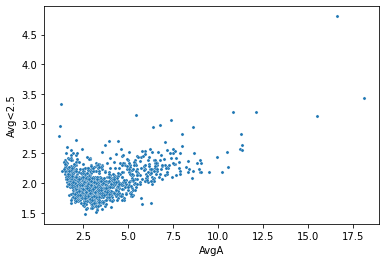

In [108]:
sns.scatterplot(df5['AvgA'], df5['Avg<2.5'], s=10);